


We will read in the file with the celebrity attributes and perform data cleaning




In [ ]:
import pandas as pd

#read in the data for the EDA

# Path to your .txt file
file_path = "list_attr_celeba.txt"   # change to your actual path

# Read the file
df = pd.read_csv(
    file_path,
    delim_whitespace=True,   # columns are separated by spaces
    skiprows=1              # skip the first line (number of images + header)
)

# Reset index and show first few rows
df.reset_index(drop=True, inplace=True)
print(df.head())


/tmp/ipython-input-16696497.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


   5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
0                -1                1           1               -1    -1   
1                -1               -1          -1                1    -1   
2                -1               -1          -1               -1    -1   
3                -1               -1           1               -1    -1   
4                -1                1           1               -1    -1   

   Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Sideburns  Smiling  \
0     -1        -1        -1          -1          -1  ...       -1.0      1.0   
1     -1        -1         1          -1          -1  ...       -1.0      1.0   
2     -1         1        -1          -1          -1  ...       -1.0     -1.0   
3     -1        -1        -1          -1          -1  ...       -1.0     -1.0   
4     -1         1        -1          -1          -1  ...       -1.0     -1.0   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

In [ ]:
# Add image_number column starting from 1
df["image_number"] = (df.index + 1).astype(str).str.zfill(6) + ".jpg"

# Move it to the first column if you prefer
df = df[["image_number"] + [col for col in df.columns if col != "image_number"]]

# Preview the result
df.head()


,image_number,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [ ]:
df = df.replace(-1, 0)
df

,image_number,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55645,055646.jpg,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
55646,055647.jpg,1,1,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55647,055648.jpg,0,1,1,0,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
55648,055649.jpg,1,0,1,0,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.isna().sum()


,0
image_number,0
5_o_Clock_Shadow,0
Arched_Eyebrows,0
Attractive,0
Bags_Under_Eyes,0
Bald,0
Bangs,0
Big_Lips,0
Big_Nose,0
Black_Hair,0


Here are our EDA graphs

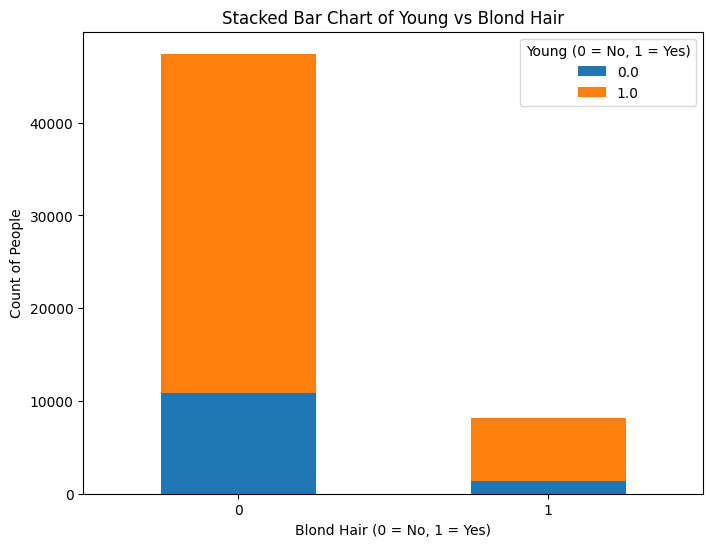

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute counts
counts = df.groupby(['Blond_Hair', 'Young']).size().unstack()

# Plot
counts.plot(kind='bar', stacked=True, figsize=(8,6))

# Add labels to the graph
plt.title("Stacked Bar Chart of Young vs Blond Hair")
plt.xlabel("Blond Hair (0 = No, 1 = Yes)")
plt.ylabel("Count of People")
plt.legend(title="Young (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.savefig('stackedbar.png')
plt.show()


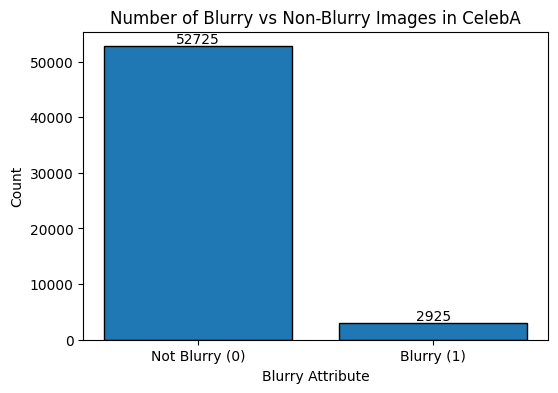

In [ ]:
import matplotlib.pyplot as plt

# Count blurry vs not blurry
blurry_counts = df["Blurry"].value_counts().sort_index()  # ensures [0,1] order

labels = ["Not Blurry (0)", "Blurry (1)"]
values = blurry_counts.values

plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, edgecolor='black')

# Add counts on top of bars
for bar, count in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # x-position
        height,                            # y-position
        str(count),                        # text
        ha='center', va='bottom', fontsize=10
    )

plt.title("Number of Blurry vs Non-Blurry Images in CelebA")
plt.ylabel("Count")
plt.xlabel("Blurry Attribute")
plt.savefig('blurry.png')
plt.show()


**We will mount the drive and read in the celebrity photos**

In [ ]:
#Mount on the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#unzip the images in the celeb file
ZIP_PATH = "/content/drive/MyDrive/CelebA/img_align_celeba (1).zip"

!unzip -o "{ZIP_PATH}" -d /content/celeba_images


Streaming output truncated to the last 5000 lines.
 extracting: /content/celeba_images/img_align_celeba/197600.jpg  
 extracting: /content/celeba_images/img_align_celeba/197601.jpg  
 extracting: /content/celeba_images/img_align_celeba/197602.jpg  
 extracting: /content/celeba_images/img_align_celeba/197603.jpg  
 extracting: /content/celeba_images/img_align_celeba/197604.jpg  
 extracting: /content/celeba_images/img_align_celeba/197605.jpg  
 extracting: /content/celeba_images/img_align_celeba/197606.jpg  
 extracting: /content/celeba_images/img_align_celeba/197607.jpg  
 extracting: /content/celeba_images/img_align_celeba/197608.jpg  
 extracting: /content/celeba_images/img_align_celeba/197609.jpg  
 extracting: /content/celeba_images/img_align_celeba/197610.jpg  
 extracting: /content/celeba_images/img_align_celeba/197611.jpg  
 extracting: /content/celeba_images/img_align_celeba/197612.jpg  
 extracting: /content/celeba_images/img_align_celeba/197613.jpg  
 extracting: /content/cel

In [ ]:
import os

#set the directory
img_dir = "/content/celeba_images/img_align_celeba"
print("Number of images:", len(os.listdir(img_dir)))
print("First 5 images:", sorted(os.listdir(img_dir))[:5])


Number of images: 202599
First 5 images: ['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg']


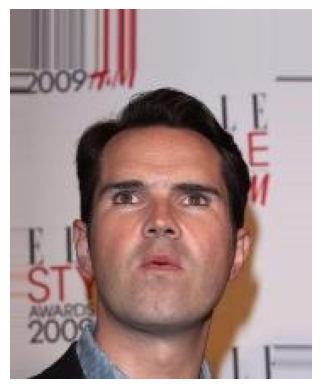

File shown: 000069.jpg


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

#find a picture for sanity check

img_dir = "/content/celeba_images/img_align_celeba"

# Get a sorted list of all image filenames
files = sorted(os.listdir(img_dir))

# Load the 69th image (Python is 0-indexed → index 68)
img_path = os.path.join(img_dir, files[68])

img = Image.open(img_path).convert("RGB")

plt.imshow(img)
plt.axis("off")
plt.show()

print("File shown:", files[68])


In [ ]:
import os
from collections import Counter

input_folder = "/content/drive/MyDrive/Pics-ds4002"  # <- your folder

files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]
print("Total files in folder:", len(files))
print("First 10 files:", files[:10])

ext_counts = Counter(os.path.splitext(f)[1] for f in files)
print("Extensions and counts:", ext_counts)


Total files in folder: 30
First 10 files: ['IMG_6204.HEIC', 'IMG_6604.HEIC', 'edd02f25-2aee-4f39-8929-efc27187eb97.jpg', '0032_5A000018540032_Original.heic', '7eabbec9-cb1a-4eea-8f38-75ff17e026ae.jpg', '98eb7d8d-6728-4d4d-b79b-a99f318ea7b1.jpg', 'IMG_9092.JPG', '82b5b569-74f0-4b26-b3e6-017c57b1bd83.jpg', 'a1aaf516-fc0f-4f2a-a0af-6ac5ac2edead.jpg', 'IMG_5982.JPG']
Extensions and counts: Counter({'.JPG': 10, '.HEIC': 8, '.jpg': 8, '.heic': 4})


In [ ]:
!pip install pillow-heif


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.5 MB/s eta 0:00:00


In [ ]:
from pillow_heif import register_heif_opener
register_heif_opener()  # makes PIL able to open .heic/.HEIC


**This will crop the images you want to add**

In [ ]:
import os
from PIL import Image, ImageOps
from pillow_heif import register_heif_opener

register_heif_opener()  # enable HEIC support

def png_to_jpg_cropped(
    input_path,
    output_path,
    size: tuple[int, int],
    background_color=(255, 255, 255)
):
    img = Image.open(input_path).convert("RGBA")

    fitted = ImageOps.fit(
        img,
        size,
        method=Image.LANCZOS,
        centering=(0.5, 0.5)
    )

    background = Image.new("RGB", size, background_color)
    if "A" in fitted.getbands():
        background.paste(fitted, mask=fitted.split()[3])
    else:
        background.paste(fitted)

    background.save(output_path, format="JPEG", quality=95)

# folders
input_folder = "/content/drive/MyDrive/Pics-ds4002"
output_folder = "/content/drive/MyDrive/Pics-ds4002-resized"

os.makedirs(output_folder, exist_ok=True)

converted = 0
failed = []

for fname in os.listdir(input_folder):
    in_path = os.path.join(input_folder, fname)
    if not os.path.isfile(in_path):
        continue

    base, _ = os.path.splitext(fname)
    out_path = os.path.join(output_folder, base + ".jpg")

    try:
        png_to_jpg_cropped(
            input_path=in_path,
            output_path=out_path,
            size=(178, 218)
        )
        converted += 1
    except Exception as e:
        failed.append((fname, str(e)))
        print(f"Failed on {fname}: {e}")

print(f"\nDone! Converted {converted} images out of {len(os.listdir(input_folder))}.")
print("Failed files:", [f for f, _ in failed])



Done! Converted 30 images out of 30.
Failed files: []


**Deletes photos that are blurry**

In [ ]:
import os
import pandas as pd

# ------------------------------------------
# 0. PATHS
# ------------------------------------------
img_dir = "/content/celeba_images/img_align_celeba"   # Your CelebA image folder

# ------------------------------------------
# 1. Fix NaN in Blurry column, convert to int
# ------------------------------------------
df["Blurry"] = df["Blurry"].fillna(0).astype(int)

print("Unique values in Blurry column (after cleaning):", df["Blurry"].unique())

# ------------------------------------------
# 2. Identify all blurry image filenames
# ------------------------------------------
blurry_files = df.loc[df["Blurry"] == 1, "image_number"].tolist()

print("\nNumber of blurry images:", len(blurry_files))
print("First 10 blurry images:", blurry_files[:10])

# ------------------------------------------
# 3. Build full paths to blurry images
# ------------------------------------------
blurry_paths = [os.path.join(img_dir, fname) for fname in blurry_files]

# ------------------------------------------
# 4. Delete blurry images from image folder
# ------------------------------------------
deleted = 0
missing = 0

for path in blurry_paths:
    if os.path.exists(path):
        os.remove(path)
        deleted += 1
    else:
        missing += 1

print("\nDeleted blurry images:", deleted)
print("Missing (already not in folder):", missing)

# ------------------------------------------
# 5. Filter out blurry rows from dataframe
# ------------------------------------------
df_clean = df[df["Blurry"] == 0].reset_index(drop=True)

print("\nClean dataframe shape:", df_clean.shape)

# ------------------------------------------
# 6. Verify no blurry files remain
# ------------------------------------------
remaining_files = set(os.listdir(img_dir))
leftover = [f for f in blurry_files if f in remaining_files]

print("Blurry images still in folder (should be 0):", len(leftover))


Unique values in Blurry column (after cleaning): [0 1]

Number of blurry images: 2925
First 10 blurry images: ['000003.jpg', '000049.jpg', '000070.jpg', '000084.jpg', '000096.jpg', '000127.jpg', '000167.jpg', '000233.jpg', '000241.jpg', '000245.jpg']

Deleted blurry images: 2925
Missing (already not in folder): 0

Clean dataframe shape: (52725, 41)
Blurry images still in folder (should be 0): 0


**Creates our CNN**

In [ ]:
import os
import random
import shutil
from pathlib import Path

random.seed(42)

# ✅ CelebA directory (confirmed from your printout)
celeb_dir = "/content/celeba_images/img_align_celeba"

# ✅ CHANGE THESE to your actual member folders (resized images)
member_dirs = {
    "Atharv": "/content/drive/MyDrive/Pics-ds4002-resized",
    "Haley": "/content/drive/MyDrive/Haley Photos",
    "Noya": "/content/drive/MyDrive/Noya Photots",
}

# Where we'll put train/test
base_out = Path("/content/group_celeb_data")

# Clean previous runs (so counts stay correct)
if base_out.exists():
    shutil.rmtree(base_out)

train_out = base_out / "train"
test_out  = base_out / "test"

for split_dir in [train_out, test_out]:
    (split_dir / "celeb").mkdir(parents=True, exist_ok=True)
    for name in member_dirs.keys():
        (split_dir / name).mkdir(parents=True, exist_ok=True)

# ---------- CelebA: sample 500 and split 400/100 ----------

celeb_files = sorted(
    str(Path(celeb_dir) / f)
    for f in os.listdir(celeb_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
)

print("Total celeb images available:", len(celeb_files))

sample_size = 500
if len(celeb_files) < sample_size:
    raise ValueError(f"Only {len(celeb_files)} celeb images found, need {sample_size}.")

celeb_sample = random.sample(celeb_files, sample_size)
celeb_train  = celeb_sample[:400]
celeb_test   = celeb_sample[400:]

print("Celeb train size:", len(celeb_train))
print("Celeb test size :", len(celeb_test))

# ---------- Group members: 20 train / 5 test each ----------

member_train = {}
member_test  = {}

for name, folder in member_dirs.items():
    all_files = sorted(
        str(Path(folder) / f)
        for f in os.listdir(folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    )
    print(f"{name}: found {len(all_files)} images")

    if len(all_files) < 25:
        print(f"  WARNING: {name} has < 25 images, using what is available.")

    random.shuffle(all_files)
    member_train[name] = all_files[:20]
    member_test[name]  = all_files[20:25]  # next 5

def copy_list(file_list, dest_dir: Path):
    for src in file_list:
        src_path = Path(src)
        shutil.copy2(src_path, dest_dir / src_path.name)

# Copy celeb images
copy_list(celeb_train, train_out / "celeb")
copy_list(celeb_test,  test_out  / "celeb")

# Copy member images
for name in member_dirs.keys():
    copy_list(member_train[name], train_out / name)
    copy_list(member_test[name],  test_out  / name)

print("\nFinished creating train/test folders 👍")

# ---------- Sanity check ----------

def count_files(folder: Path):
    return sum(len(files) for _, _, files in os.walk(folder))

print("\nTrain split:")
print("  total:", count_files(train_out))
print("  celeb:", len(os.listdir(train_out / "celeb")))
for name in member_dirs.keys():
    print(f"  {name}:", len(os.listdir(train_out / name)))

print("\nTest split:")
print("  total:", count_files(test_out))
print("  celeb:", len(os.listdir(test_out / "celeb")))
for name in member_dirs.keys():
    print(f"  {name}:", len(os.listdir(test_out / name)))


Total celeb images available: 199674
Celeb train size: 400
Celeb test size : 100
Atharv: found 25 images
Haley: found 25 images
Noya: found 25 images

Finished creating train/test folders 👍

Train split:
  total: 460
  celeb: 400
  Atharv: 20
  Haley: 20
  Noya: 20

Test split:
  total: 115
  celeb: 100
  Atharv: 5
  Haley: 5
  Noya: 5


In [ ]:
# ================================
# 1. Imports & device
# ================================
import os
from pathlib import Path

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

from sklearn.metrics import classification_report, confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ================================
# 2. Paths & transforms
# ================================
base_dir = Path("/content/group_celeb_data")  # change if needed
train_dir = base_dir / "train"
test_dir  = base_dir / "test"

# CelebA images are already 178x218, but we can just resize/crop to a standard size
img_size = (224, 224)  # standard ImageNet size for ResNet

train_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),   # simple augmentation
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],      # ImageNet stats
        std=[0.229, 0.224, 0.225]
    )
])

test_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# ================================
# 3. Datasets & dataloaders
# ================================
train_dataset = datasets.ImageFolder(root=str(train_dir), transform=train_transform)
test_dataset  = datasets.ImageFolder(root=str(test_dir),  transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

class_names = train_dataset.classes
num_classes = len(class_names)
print("Classes:", class_names, " (num_classes =", num_classes, ")")

# ================================
# 4. Model: ResNet18 fine-tuning
# ================================
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
# replace final FC layer to match our 4 classes
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ================================
# 5. Training loop
# ================================
def train_model(model, train_loader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

            # accuracy for this batch
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")

    return model

model = train_model(model, train_loader, criterion, optimizer, device, epochs=5)

# ================================
# 6. Evaluation on test set
# ================================
model.eval()
all_labels = []
all_preds  = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# overall accuracy
all_labels_tensor = torch.tensor(all_labels)
all_preds_tensor  = torch.tensor(all_preds)
accuracy = (all_labels_tensor == all_preds_tensor).float().mean().item()
print(f"\nTest Accuracy: {accuracy:.4f}")

# per-class precision/recall/F1
print("\nClassification report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion matrix (rows = true, cols = predicted):\n", cm)


Using device: cpu
Classes: ['Atharv', 'Haley', 'Noya', 'celeb']  (num_classes = 4 )
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [1/5] Loss: 0.7070  Acc: 0.8304
Epoch [2/5] Loss: 0.0830  Acc: 0.9957
Epoch [3/5] Loss: 0.0326  Acc: 0.9913
Epoch [4/5] Loss: 0.0367  Acc: 0.9913
Epoch [5/5] Loss: 0.0203  Acc: 0.9978

Test Accuracy: 0.9913

Classification report:
              precision    recall  f1-score   support

      Atharv       1.00      0.80      0.89         5
       Haley       1.00      1.00      1.00         5
        Noya       0.83      1.00      0.91         5
       celeb       1.00      1.00      1.00       100

    accuracy                           0.99       115
   macro avg       0.96      0.95      0.95       115
weighted avg       0.99      0.99      0.99       115

Confusion matrix (rows = true, cols = predicted):
 [[  4   0   1   0]
 [  0   5   0   0]
 [  0   0   5   0]
 [  0   0   0 100]]


**Shows an output of our model**


=== Showing predictions for Atharv ===
Found 5 test images.


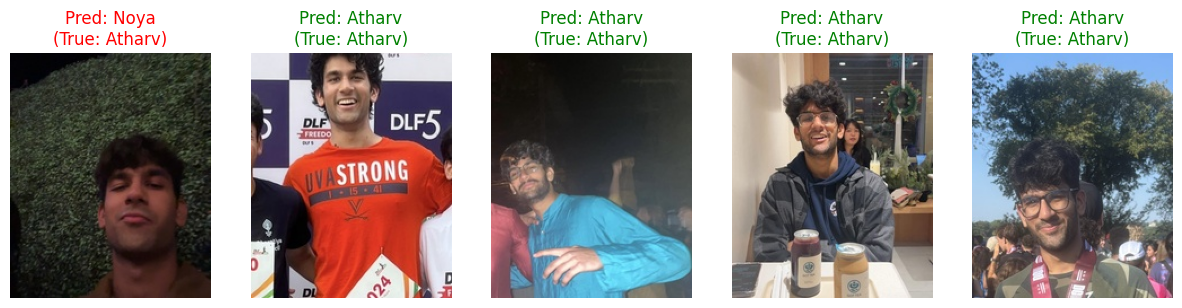


=== Showing predictions for Haley ===
Found 5 test images.


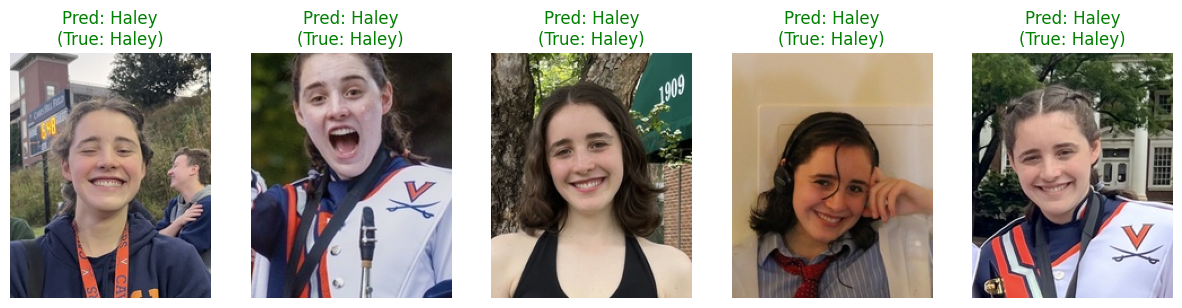


=== Showing predictions for Noya ===
Found 5 test images.


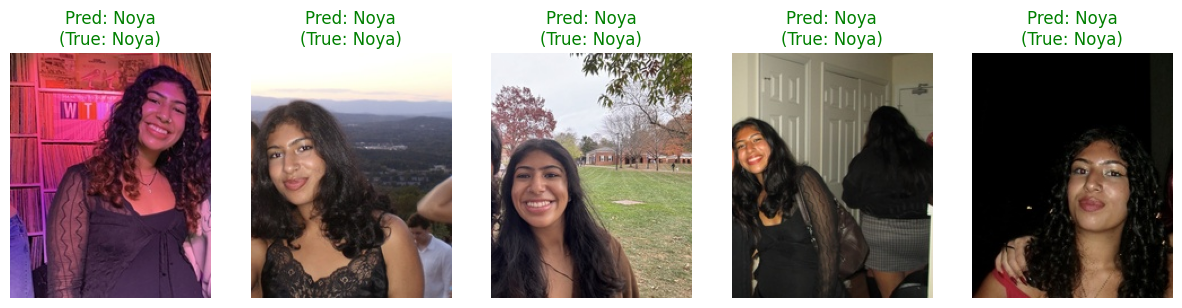

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
import os

def show_predictions_for_member(member_name, test_dir, model, class_names, device):
    """
    Shows test images for a given member (folder named as member_name)
    and displays model predictions.
    """
    member_path = test_dir / member_name
    image_files = [
        f for f in os.listdir(member_path)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]

    print(f"\n=== Showing predictions for {member_name} ===")
    print(f"Found {len(image_files)} test images.")

    plt.figure(figsize=(15, 6))

    for idx, fname in enumerate(image_files):
        img_path = member_path / fname

        img = Image.open(img_path).convert("RGB")
        img_tensor = test_transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            logits = model(img_tensor)
            probs = F.softmax(logits, dim=1)
            pred_idx = torch.argmax(probs, dim=1).item()

        pred_class = class_names[pred_idx]
        true_label = member_name
        correct = (pred_class == true_label)

        plt.subplot(1, len(image_files), idx + 1)
        plt.imshow(img)
        plt.axis("off")

        color = "green" if correct else "red"
        plt.title(f"Pred: {pred_class}\n(True: {true_label})", color=color)

    plt.show()


# 👉 Put your actual folder names here (must match the folder names under test/)
member_names = ["Atharv", "Haley", "Noya"]  # <<< change these to your real names/folders

for member_name in member_names:
    show_predictions_for_member(member_name, test_dir, model, class_names, device)
